## Домашнее задание

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

sns.set(font_scale=1.5, style='whitegrid')

Задание просто: завершить работу с датасетом, который был на семинаре.

Вещественные переменные:
1. BMI - индекс массы
2. PhysicalHealth - сколько из последних 30 дней пациент чувствовал себя плохо
3. MentalHealth - сколько из последних 30 дней пациент чувствовал себя плохо физически
4. SleepTime - сколько спит в день


Бинарные переменные:
1. Smoking - выкурил ли человек за жизнь 100 сигарет
2. AlcoholDrinking - для мужчин: пьет 14 напитков в неделю, для женщин - больше 7
3. Stroke - был ли инсульт
4. DiffWalking - есть ли сложности с ходьбой или поднятием по лестнице
5. Sex - Male / Female
6. PhysicalActivity - в последние 30 дней занимались спортом больше, чем основной работой
7. Asthma - есть/была астма
8. KidneyDisease - были ли болезни почек (кроме камней, ...)
9. SkinCancer - был ли рак кожи

Категориальные переменные:
1. AgeCategory - возраст
2. Race - раса
3. Diabetic - есть/был диабет (Yes / No / ...)
5. GenHealth - как пациент оценивает свое здоровье

Таргет - HeartDisease - была ли ишемическая болезнь сердца либо инфаркт миокарда

In [ ]:
train = pd.read_csv('train.csv')
data_train = train.iloc[:, 1:]
target_train = train.iloc[:, 0]

val = pd.read_csv('val.csv')
data_val = val.iloc[:, 1:]
target_val = val.iloc[:, 0]

test = pd.read_csv('test.csv')
data_test = test.iloc[:, 1:]
target_test = test.iloc[:, 0]

In [ ]:
data_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,24.68,No,No,No,0.0,0.0,No,Female,55-59,White,Yes (during pregnancy),Yes,Good,7.0,No,No,No
1,29.29,No,No,No,3.0,0.0,Yes,Female,65-69,Asian,No,Yes,Fair,8.0,Yes,No,No
2,83.0,Yes,Yes,No,0.0,0.0,No,Male,35-39,Other,No,Yes,Excellent,6.0,No,No,No
3,24.89,NaN,No,No,0.0,0.0,No,Female,45-49,White,No,Yes,Very good,6.0,Yes,No,No
4,27.98,No,No,No,7.0,30.0,No,Female,25-29,Black,No,No,Fair,7.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206839,24.41,No,No,No,0.0,0.0,No,Female,75-79,White,No,Yes,Excellent,10.0,No,No,No
206840,27.96,Yes,No,No,0.0,0.0,No,Female,50-54,White,No,NaN,Good,5.0,No,No,No
206841,35.51,No,No,No,2.0,0.0,No,Male,55-59,White,No,NaN,Fair,8.0,No,No,No
206842,29.86,No,No,No,0.0,6.0,No,Female,18-24,Black,No,No,Very good,NaN,No,No,No


In [ ]:
np.unique(target_train, return_counts=True)

(array(['No', 'Yes', 'e'], dtype=object), array([189322,  17521,      1]))

Удалим строку, содержащую 'e'

In [ ]:
target_train[target_train == 'e']

204668    e
Name: HeartDisease, dtype: object

In [ ]:
data_train.loc[204668]

BMI                 65-69
Smoking             White
AlcoholDrinking        No
Stroke                Yes
PhysicalHealth       Fair
MentalHealth          7.0
DiffWalking           Yes
Sex                    No
AgeCategory            No
Race                  NaN
Diabetic              NaN
PhysicalActivity      NaN
GenHealth             NaN
SleepTime             NaN
Asthma                NaN
KidneyDisease         NaN
SkinCancer            NaN
Name: 204668, dtype: object

In [ ]:
data_train   = data_train.drop(index = 204668)
target_train = target_train.drop(index = 204668)

data_train.reset_index(drop = True, inplace = True)
target_train.reset_index(drop = True, inplace = True)

In [ ]:
np.unique(target_train, return_counts=True)

(array(['No', 'Yes'], dtype=object), array([189322,  17521]))

**Напоминание:** На тестовой выборке только считаем итоговое качество. До этого ее использовать нельзя

Посмотрите, в каких признаках есть пропуски. В дальнейшем их придётся изучить подробнее.

In [ ]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206843 entries, 0 to 206842
Data columns (total 17 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   BMI               206843 non-null  object 
 1   Smoking           186265 non-null  object 
 2   AlcoholDrinking   206843 non-null  object 
 3   Stroke            206843 non-null  object 
 4   PhysicalHealth    206843 non-null  object 
 5   MentalHealth      206843 non-null  float64
 6   DiffWalking       194748 non-null  object 
 7   Sex               206843 non-null  object 
 8   AgeCategory       206843 non-null  object 
 9   Race              203394 non-null  object 
 10  Diabetic          206843 non-null  object 
 11  PhysicalActivity  191925 non-null  object 
 12  GenHealth         206843 non-null  object 
 13  SleepTime         175679 non-null  float64
 14  Asthma            206843 non-null  object 
 15  KidneyDisease     206843 non-null  object 
 16  SkinCancer        20

Подумайте, какой природы могут быть пропуски. Возможно, описание признаков в этом поможет:)

Проведите первичную обработку признаков и таргета (для работы с sklearn таргет должен быть числом)

In [ ]:
data_train.isna().sum()

BMI                     0
Smoking             20578
AlcoholDrinking         0
Stroke                  0
PhysicalHealth          0
MentalHealth            0
DiffWalking         12095
Sex                     0
AgeCategory             0
Race                 3449
Diabetic                0
PhysicalActivity    14918
GenHealth               0
SleepTime           31164
Asthma                  0
KidneyDisease           0
SkinCancer              0
dtype: int64

In [ ]:
for i in data_train.columns:
    print(f'{i} = {data_train[i].unique()} | {len(data_train[i].unique())}')

BMI = [24.68 29.29 83.0 ... '35.07' '26.19' '29.81'] | 4601
Smoking = ['No' 'Yes' nan] | 3
AlcoholDrinking = ['No' 'Yes'] | 2
Stroke = ['No' 'Yes'] | 2
PhysicalHealth = [0.0 3.0 7.0 1.0 10.0 5.0 2.0 15.0 30.0 20.0 8.0 4.0 28.0 25.0 6.0 14.0
 12.0 21.0 24.0 22.0 16.0 13.0 29.0 18.0 17.0 27.0 26.0 9.0 23.0 11.0 19.0
 '6.0' '0.0' '2.0' '20.0' '5.0' '30.0' '1.0' '7.0' '15.0' '4.0' '10.0'
 '25.0' '13.0' '3.0' '28.0' '14.0' '9.0' '21.0' '12.0' '8.0' '18.0' '29.0'
 '27.0' '22.0' '26.0' '24.0' '23.0' '17.0' '16.0' '11.0' '19.0'] | 62
MentalHealth = [ 0. 30.  1.  2.  3.  4. 17. 10. 20. 14.  7.  8. 25. 11. 15.  5. 28. 12.
 29. 21.  6. 27. 26. 16. 18.  9. 23. 13. 22. 24. 19.] | 31
DiffWalking = ['No' 'Yes' nan] | 3
Sex = ['Female' 'Male'] | 2
AgeCategory = ['55-59' '65-69' '35-39' '45-49' '25-29' '30-34' '18-24' '75-79' '40-44'
 '50-54' '80 or older' '60-64' '70-74'] | 13
Race = ['White' 'Asian' 'Other' 'Black' nan 'Hispanic'
 'American Indian/Alaskan Native'] | 7
Diabetic = ['Yes (during pregnan

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

encoder = OneHotEncoder(sparse=False)

y_train = (target_train == 'Yes').astype(int)
y_val = (target_val == 'Yes').astype(int)
y_test = (target_test == 'Yes').astype(int)


def my_changing(df):
    to_change = ['SkinCancer', 'KidneyDisease', 'Asthma', 'PhysicalActivity', 'DiffWalking', 'Stroke', 'AlcoholDrinking', 'Smoking']
    for i in to_change: df[i].replace(['Yes', 'No'], [0, 1], inplace=True)

    df['Race'].fillna('Other', inplace = True)
    df[['BMI', 'PhysicalHealth']] = df[['BMI', 'PhysicalHealth']].astype(float)
    df['Sex'].replace(['Male', 'Female'], [0, 1], inplace = True)
    df['AgeCategory'].replace(['55-59', '65-69', '35-39', '45-49', '25-29', '30-34', '18-24', '75-79', '40-44',
     '50-54', '80 or older', '60-64', '70-74'], [57, 67, 37, 47, 27, 32, 21, 77, 42, 52, 82, 62, 72], inplace = True)

    encoder.fit_transform(df[['Race']])
    df[[encoder.categories_][0][0]] = pd.DataFrame(encoder.fit_transform(df[['Race']]))

    encoder.fit_transform(df[['GenHealth']])
    df[[encoder.categories_][0][0]] = pd.DataFrame(encoder.fit_transform(df[['GenHealth']]))

    encoder.fit_transform(df[['Diabetic']])
    df[[encoder.categories_][0][0]] = pd.DataFrame(encoder.fit_transform(df[['Diabetic']]))

    df.drop(columns = ['Diabetic', 'GenHealth', 'Race'], inplace = True)

my_changing(data_train)
my_changing(data_test)
my_changing(data_val)

In [ ]:
for i in data_train.columns:
    print(f'{i} = {data_train[i].unique()} | {len(data_train[i].unique())}')

BMI = [24.68 29.29 83.   ... 46.35 35.22 15.02] | 3267
Smoking = [ 1.  0. nan] | 3
AlcoholDrinking = [1 0] | 2
Stroke = [1 0] | 2
PhysicalHealth = [ 0.  3.  7.  1. 10.  5.  2. 15. 30. 20.  8.  4. 28. 25.  6. 14. 12. 21.
 24. 22. 16. 13. 29. 18. 17. 27. 26.  9. 23. 11. 19.] | 31
MentalHealth = [ 0. 30.  1.  2.  3.  4. 17. 10. 20. 14.  7.  8. 25. 11. 15.  5. 28. 12.
 29. 21.  6. 27. 26. 16. 18.  9. 23. 13. 22. 24. 19.] | 31
DiffWalking = [ 1.  0. nan] | 3
Sex = [1 0] | 2
AgeCategory = [57 67 37 47 27 32 21 77 42 52 82 62 72] | 13
PhysicalActivity = [ 0.  1. nan] | 3
SleepTime = [ 7.  8.  6.  5.  9. nan 10.  4.  3.  2. 16. 11. 15. 12.  1. 14. 13. 18.
 20. 22. 24. 17. 19. 23.] | 24
Asthma = [1 0] | 2
KidneyDisease = [1 0] | 2
SkinCancer = [1 0] | 2
American Indian/Alaskan Native = [0. 1.] | 2
Asian = [0. 1.] | 2
Black = [0. 1.] | 2
Hispanic = [0. 1.] | 2
Other = [0. 1.] | 2
White = [1. 0.] | 2
Excellent = [0. 1.] | 2
Fair = [0. 1.] | 2
Good = [1. 0.] | 2
Poor = [0. 1.] | 2
Very good = [0. 

### 1. WoE line

На семинаре использовалась готовая реализация для визуализации WoE. Здесь вам предстоит написать свою.
Для того, чтобы свериться, можно посмотреть на готовые реализации, в открытом доступе они есть.

Напомним формулу для оценки WoE:
$$
\operatorname{WoE}(x) = \ln\frac{\#\{\text{признак } = x \land Y = 1\}}{\#\{\text{признак } = x \land Y = 0\}} - \ln\frac{\#\{Y = 1\}}{\#\{ Y = 0\}}
$$

Для применения формулы потребуется дискретизовать вещественные признаки. Это можно делать с помощью функции ниже. Также могут пригодиться функции [pandas.cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) или [pandas.qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html).

In [ ]:
def make_bucket(df, feature, n_buckets):
    return df.assign(bucket = np.ceil(feature.rank(pct=True) * n_buckets))

In [ ]:
def woe_null_point(x, y):

    nan_index = x.index[np.isnan(x)]
    X = x.dropna()
    Y = y.drop(index = nan_index)

    reg = LogisticRegression().fit( np.array(X).reshape((-1,1)), np.array(Y) )
    woe_null = (np.log(y[y == 1].count() / y[y==0].count()) - reg.intercept_ ) / reg.coef_
    return woe_null

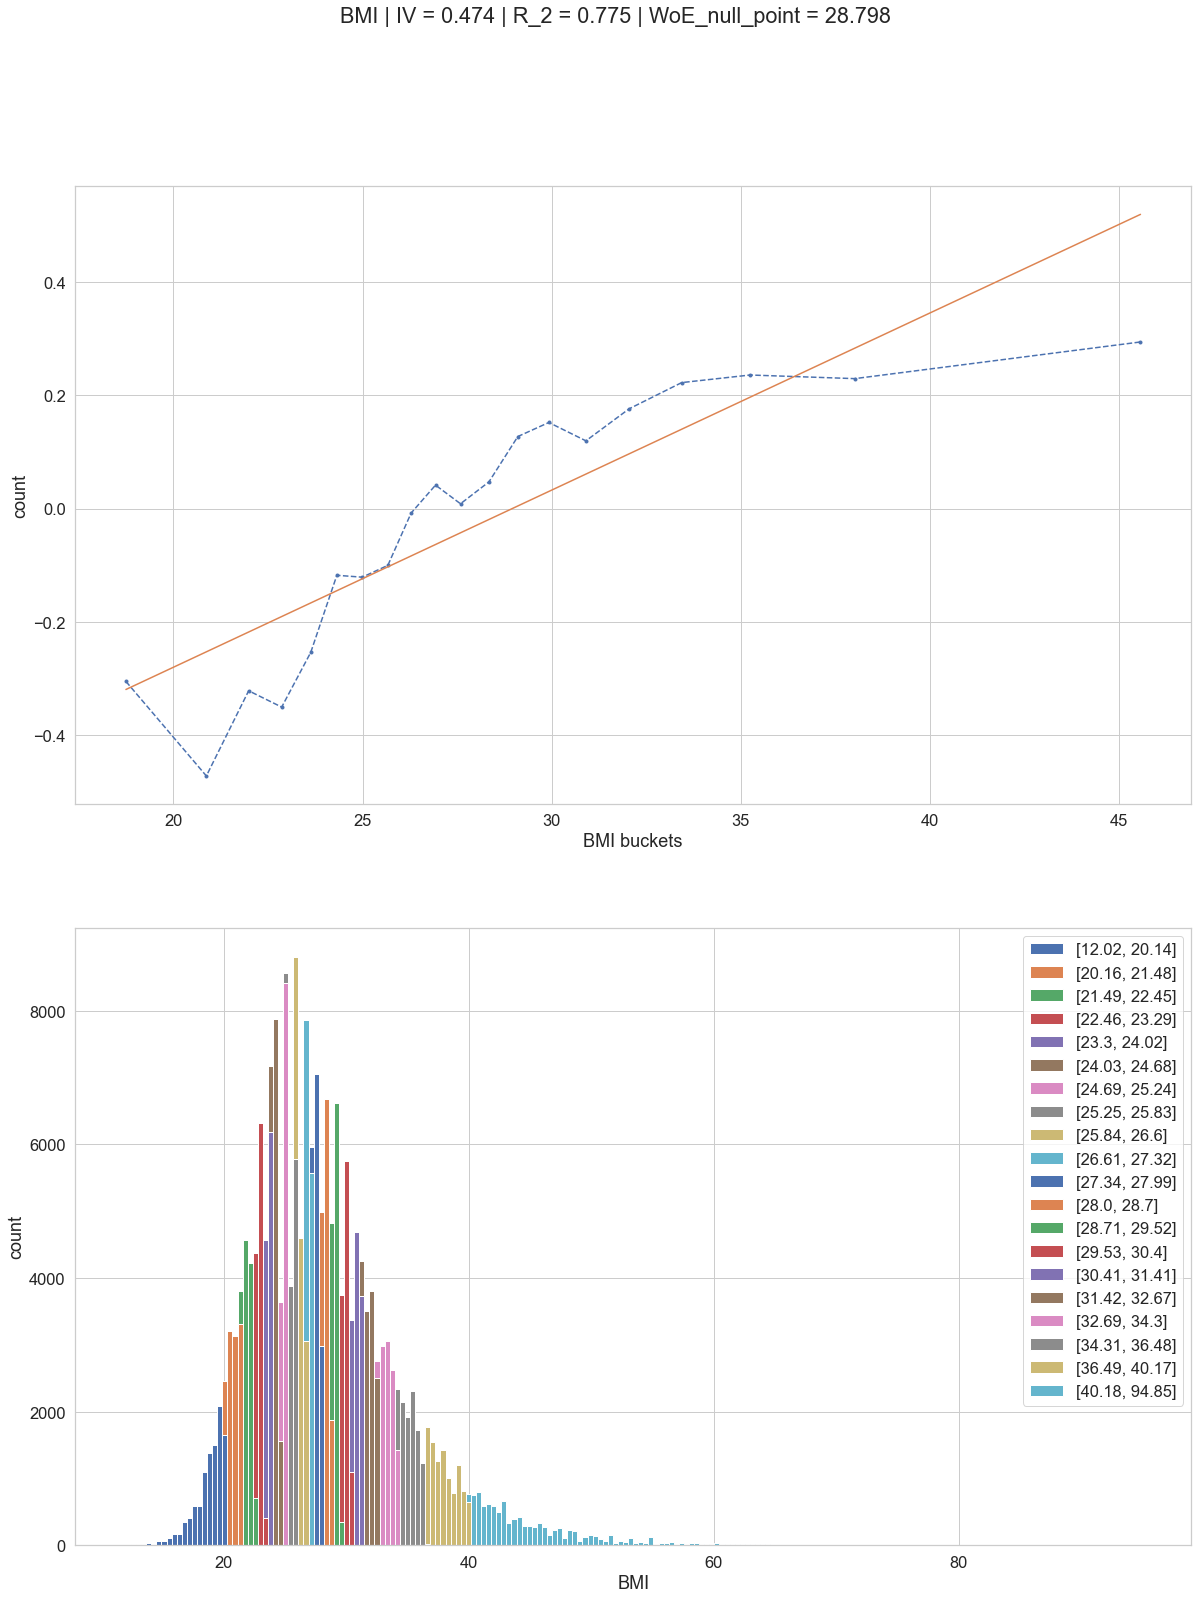

In [ ]:
def woe_line(df, x, y, n_buckets, feature_name, target_name):
    """ Строит график зависимости WoE
    x - параметр, от которого стоит искать зависимость
    y - метки класса (0 / 1)
    n_buckets - количество бинов для вещественного признака
    feature_name, target_name - подписи к графику
    """
    plt.rcParams["figure.figsize"] = (20,25)
    fig, (ax0, ax1) = plt.subplots(2, 1)


    df = make_bucket(df, x, n_buckets)



    x_buc = [df[df['bucket'] == i][feature_name] for i in range(1, n_buckets+1)]

    mean = []
    woe = []

    for i in range(n_buckets):
        mean.append( df[df['bucket'] == i + 1][feature_name].mean() )
        woe.append( np.log(df[(df['bucket'] == i + 1) & (y == 1)][feature_name].count() / df[(df['bucket'] == i + 1) & (y == 0)][feature_name].count()) - np.log( y[y == 1].count() / y[y == 0].count() ))

    IV = 0
    for i in range(n_buckets):
         IV += woe[i] * (y[(y == 1) & (df['bucket'] == i+1) ].count() - y[(y == 0) & (df['bucket'] == i+1) ].count()) / df[df['bucket'] == i+1][feature_name].count()

    model = LinearRegression()
    model.fit(np.array(mean).reshape(-1, 1), np.array(woe))
    prediction = model.predict(np.array(mean).reshape(-1, 1))

    R2 = r2_score(woe, prediction)

    ax0.plot(mean, woe, linestyle = '--', marker = '.')
    ax0.plot(mean, prediction)
    ax0.set_xlabel(f'{feature_name} buckets')
    ax0.set_ylabel('count')

    ax1.hist(x_buc, bins = n_buckets*10, histtype='barstacked', label = [format([x_buc[i].min(), x_buc[i].max()]) for i in range(n_buckets)])
    ax1.set_xlabel(feature_name)
    ax1.set_ylabel('count')
    ax1.legend()

    fig.suptitle(f'{feature_name} | IV = {round(IV, 3)} | R_2 = {round(R2, 3)} | WoE_null_point = {round(woe_null_point(x, y)[0][0], 3)}')

woe_line(data_train, data_train['BMI'], y_train, 20, 'BMI', 'HeartDisease')


**Bonus:** Можно дополнить функционал. Например, считать внутри функции IV или точку, в которой WoE равно 0.

Дополнено :)

### 2. Линеаризация признаков

Исследуйте зависимость от вещественных признаков для обучающей выборки. Это удобно делать на участке, где признак определен. При необходимости (а она, конечно, будет) произведите преобразования признаков

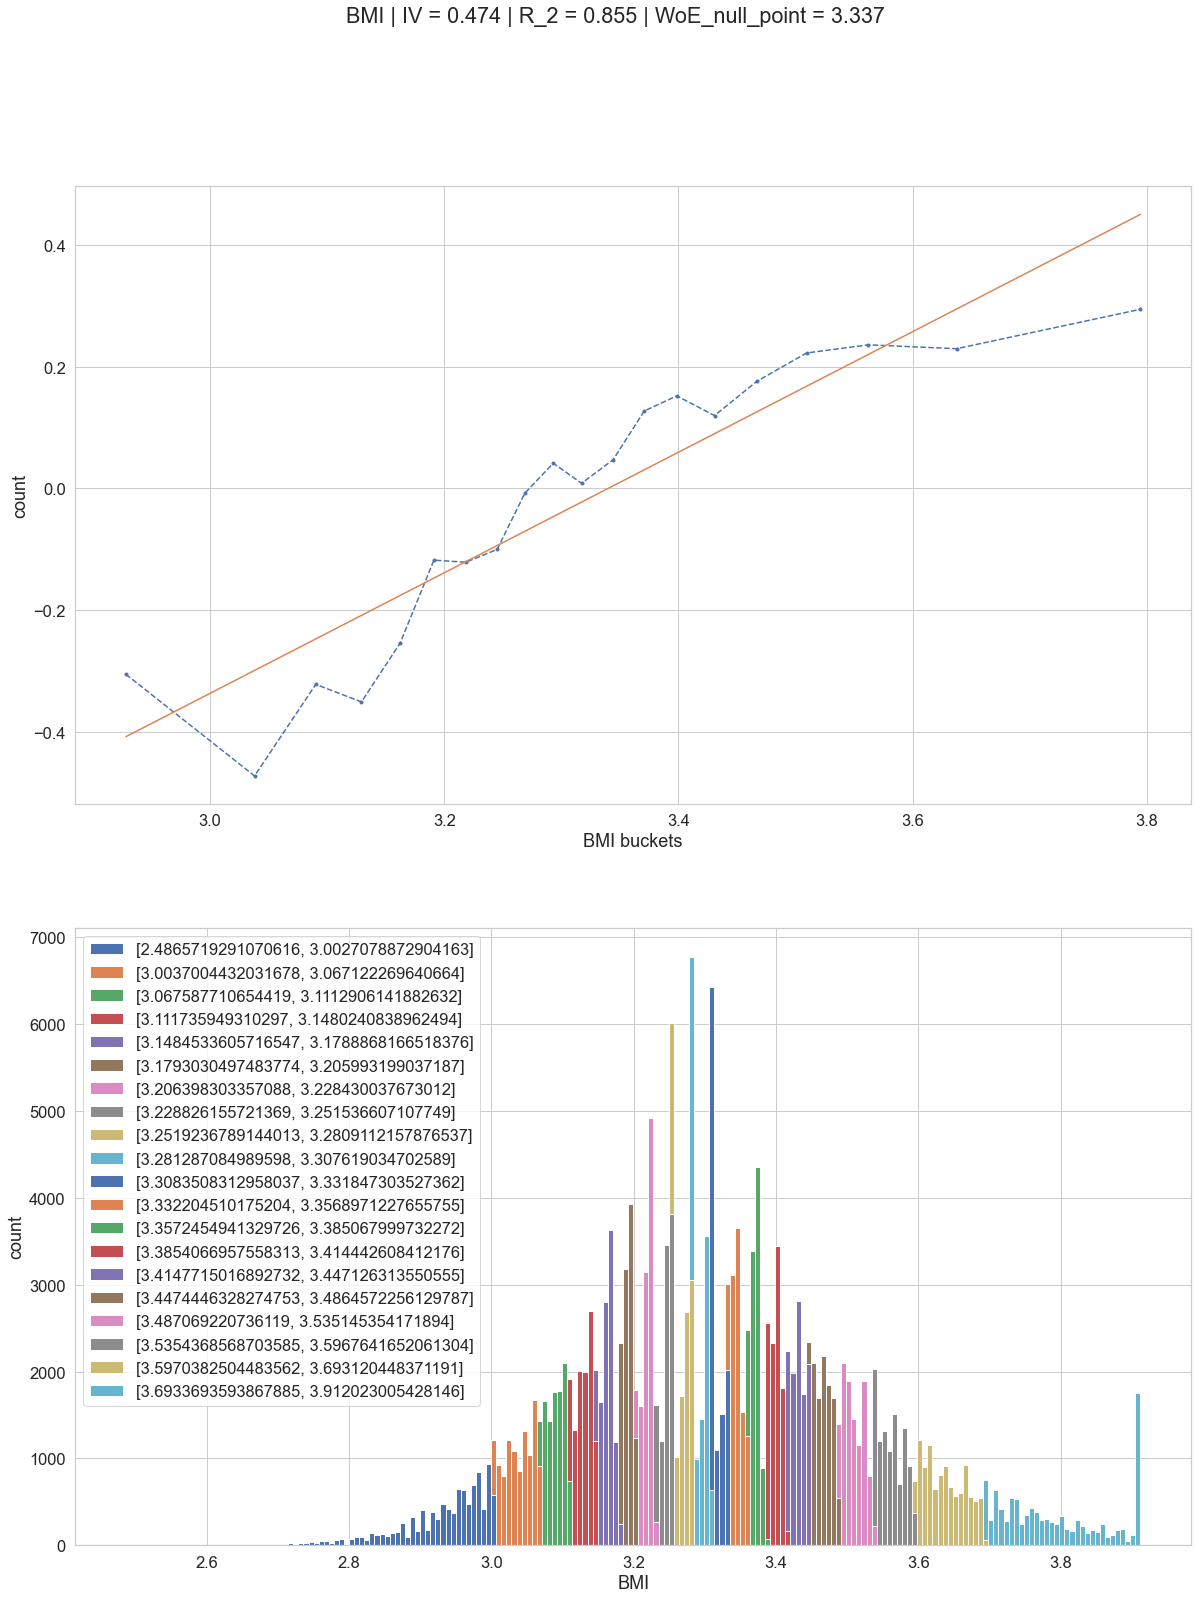

In [ ]:
data_train_clipped = data_train
data_train_clipped['BMI'] = np.log(data_train_clipped['BMI'].clip(lower = 10, upper = 50))

woe_line(data_train_clipped, data_train_clipped['BMI'], y_train, 20, 'BMI', 'HeartDisease')

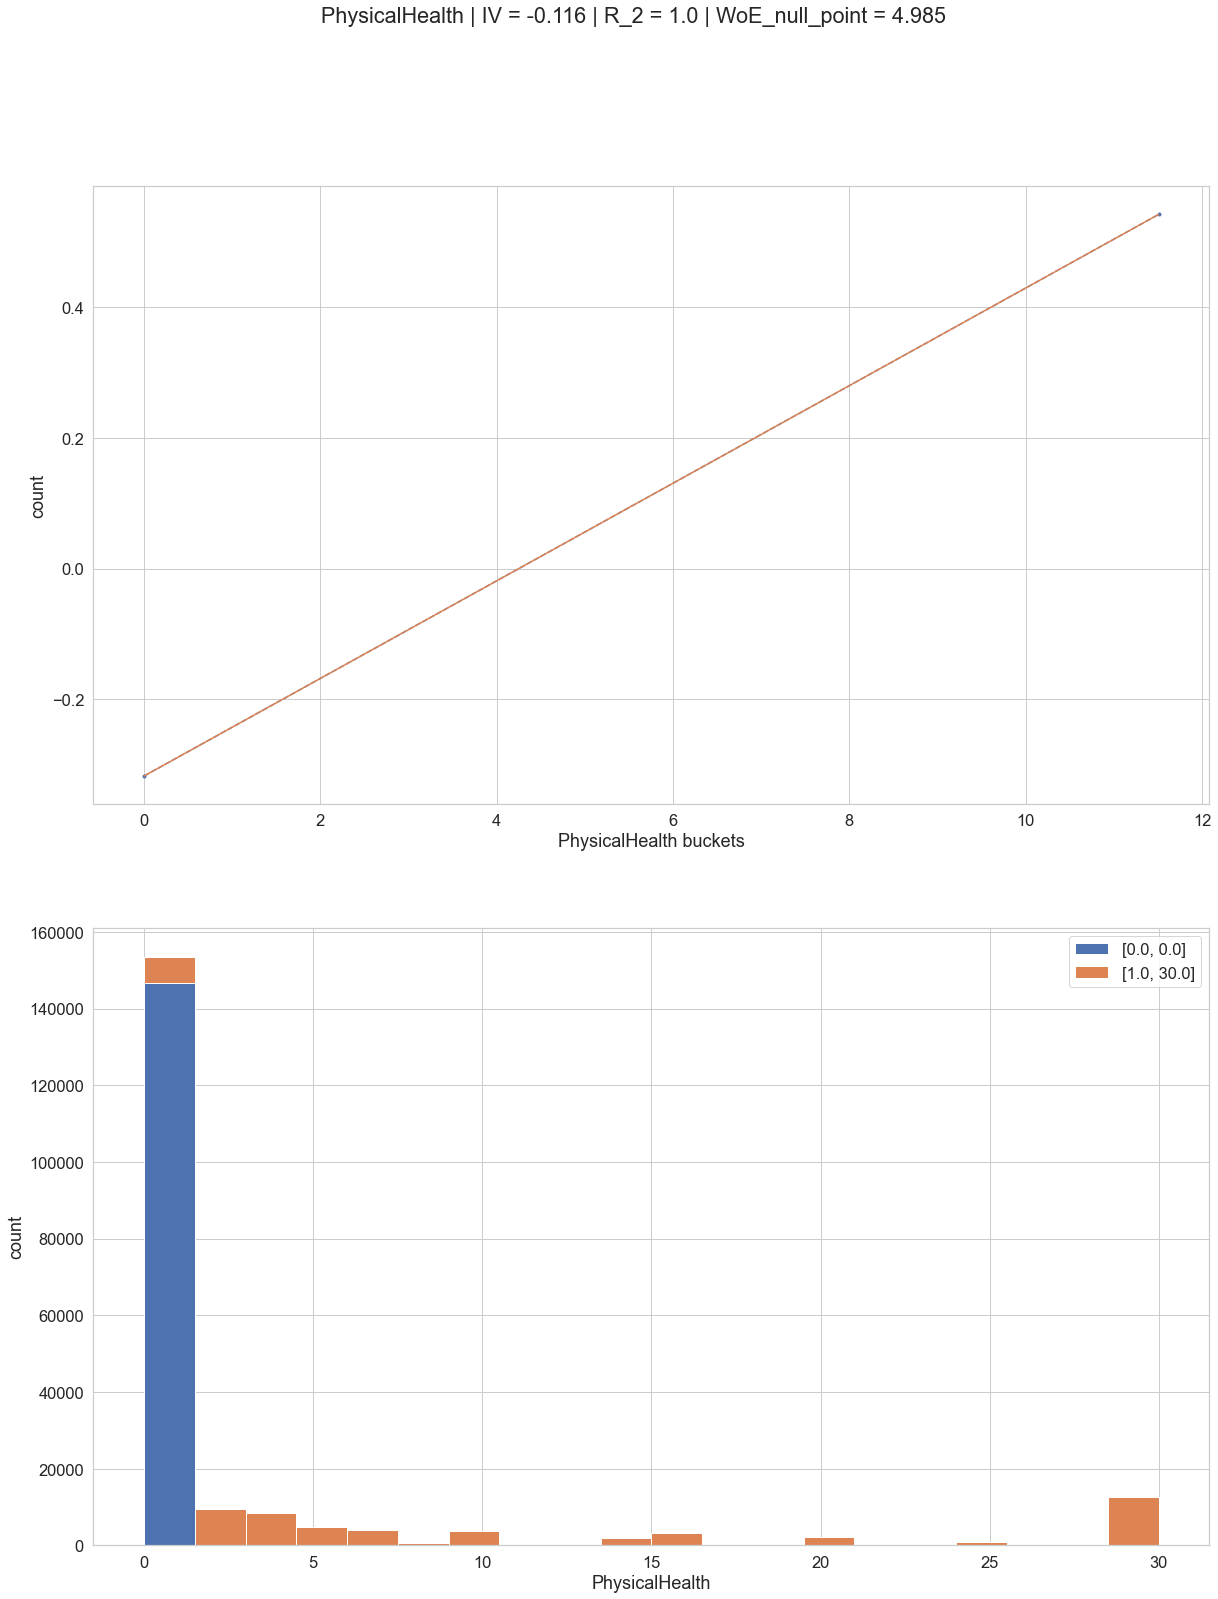

In [ ]:
name = 'PhysicalHealth'

data_train_clipped = data_train
data_train_clipped[name] = data_train_clipped[name].dropna()

woe_line(data_train_clipped, data_train_clipped[name], y_train, 2, name, 'HeartDisease')

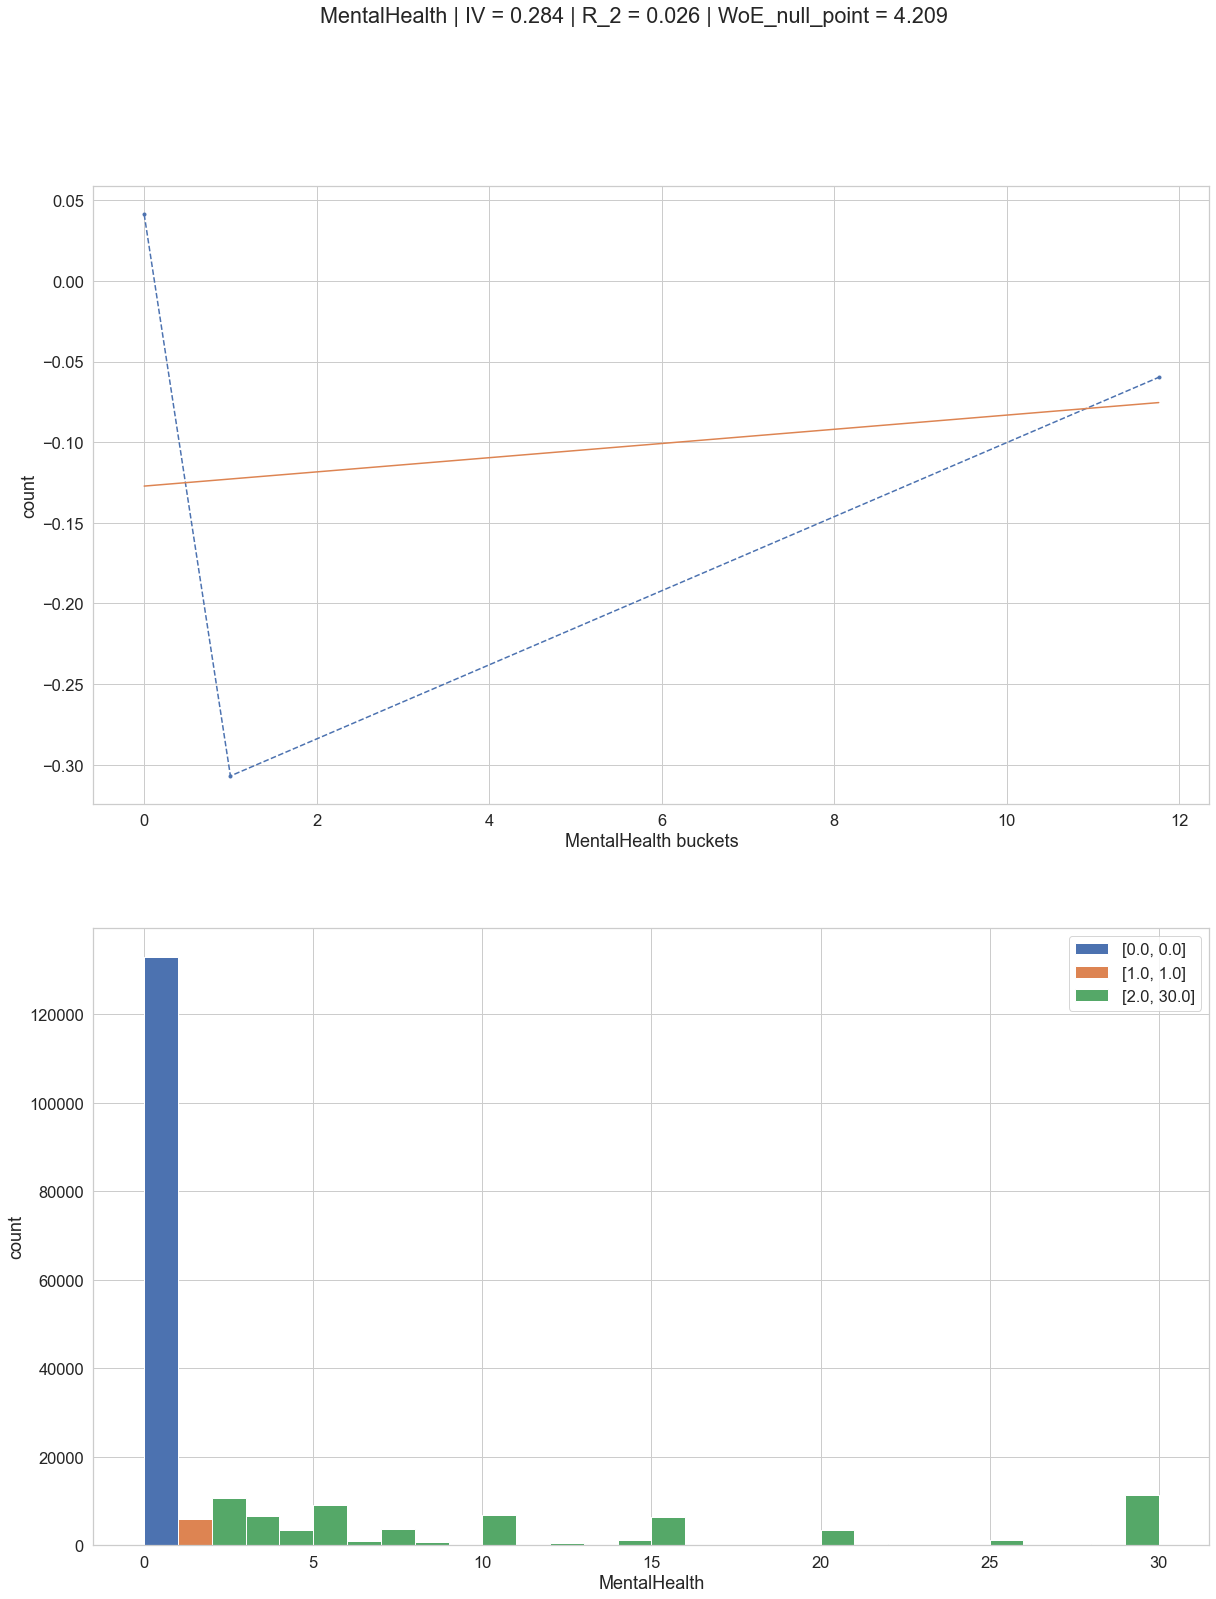

In [ ]:
name = 'MentalHealth'

data_train_clipped = data_train
data_train_clipped[name] = data_train_clipped[name]

woe_line(data_train_clipped, data_train_clipped[name], y_train, 3, name, 'HeartDisease')

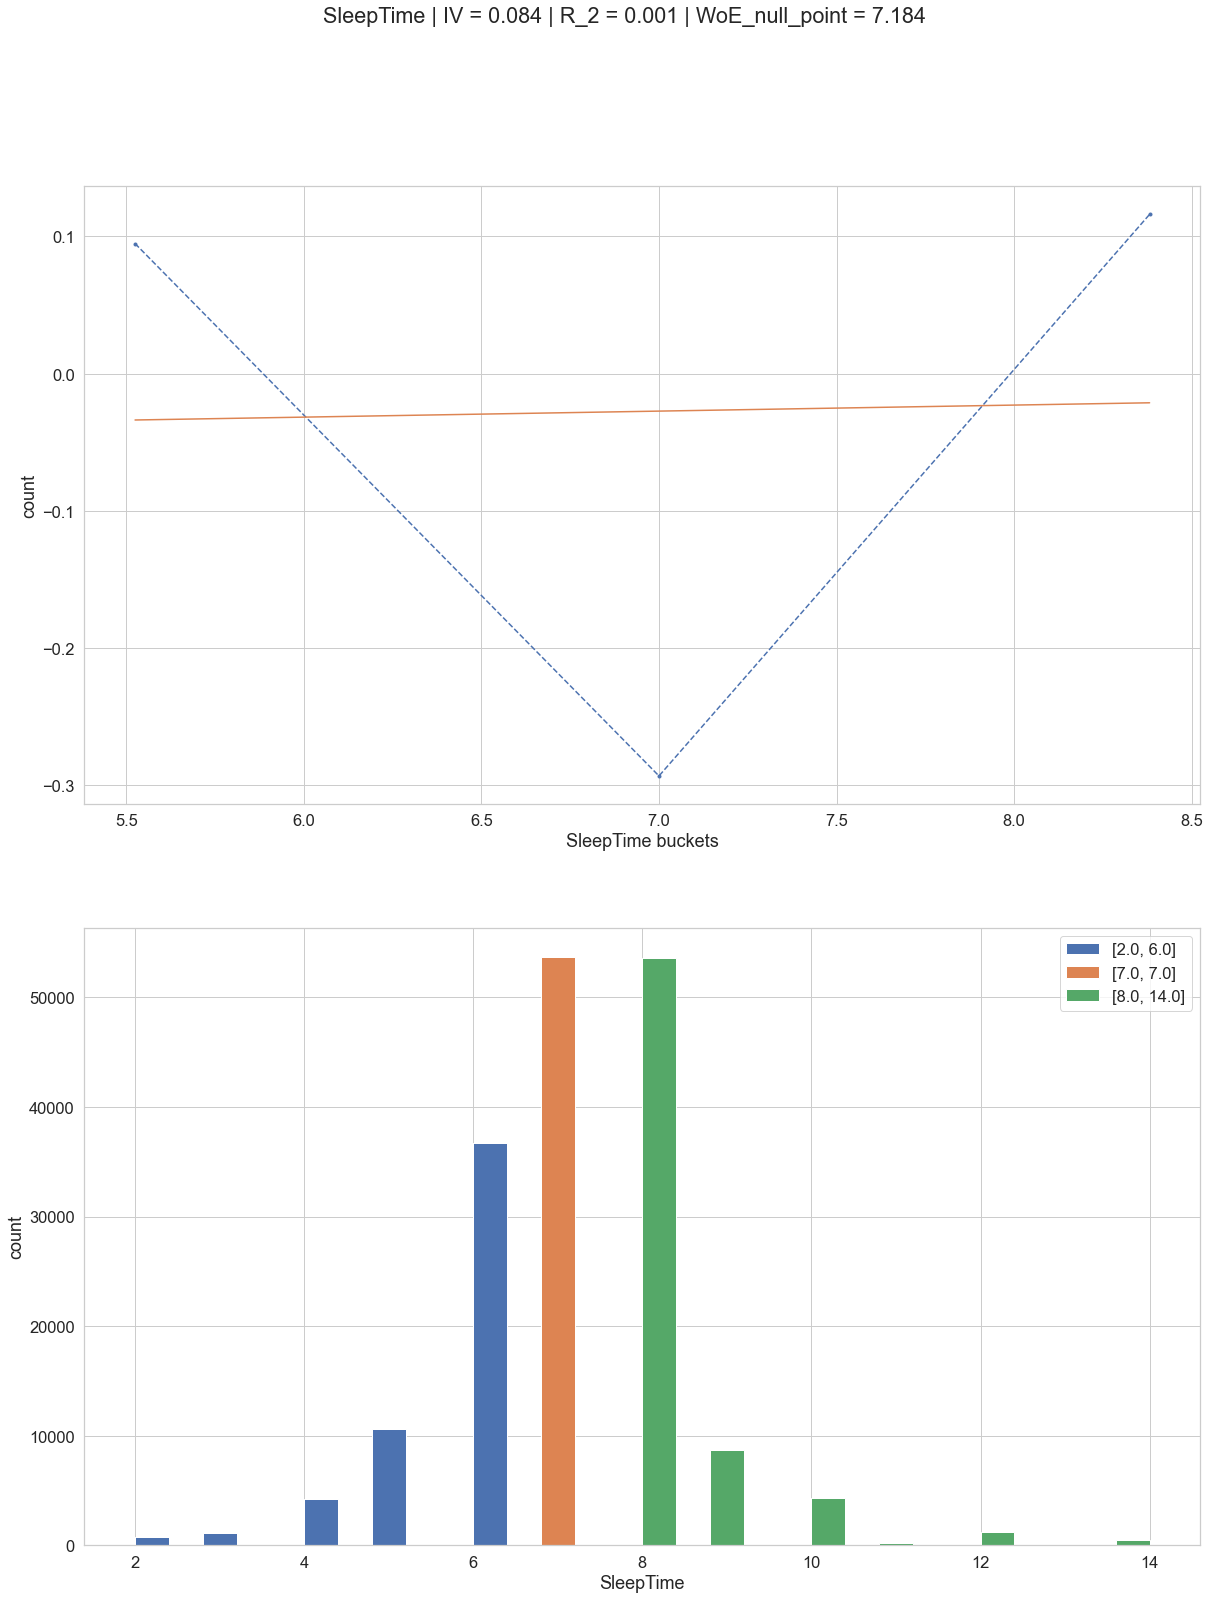

In [ ]:
name = 'SleepTime'

data_train_clipped = data_train
data_train_clipped[name] = data_train_clipped[name].clip(lower = 2, upper = 14)

woe_line(data_train_clipped, data_train_clipped[name], y_train, 3, name, 'HeartDisease')

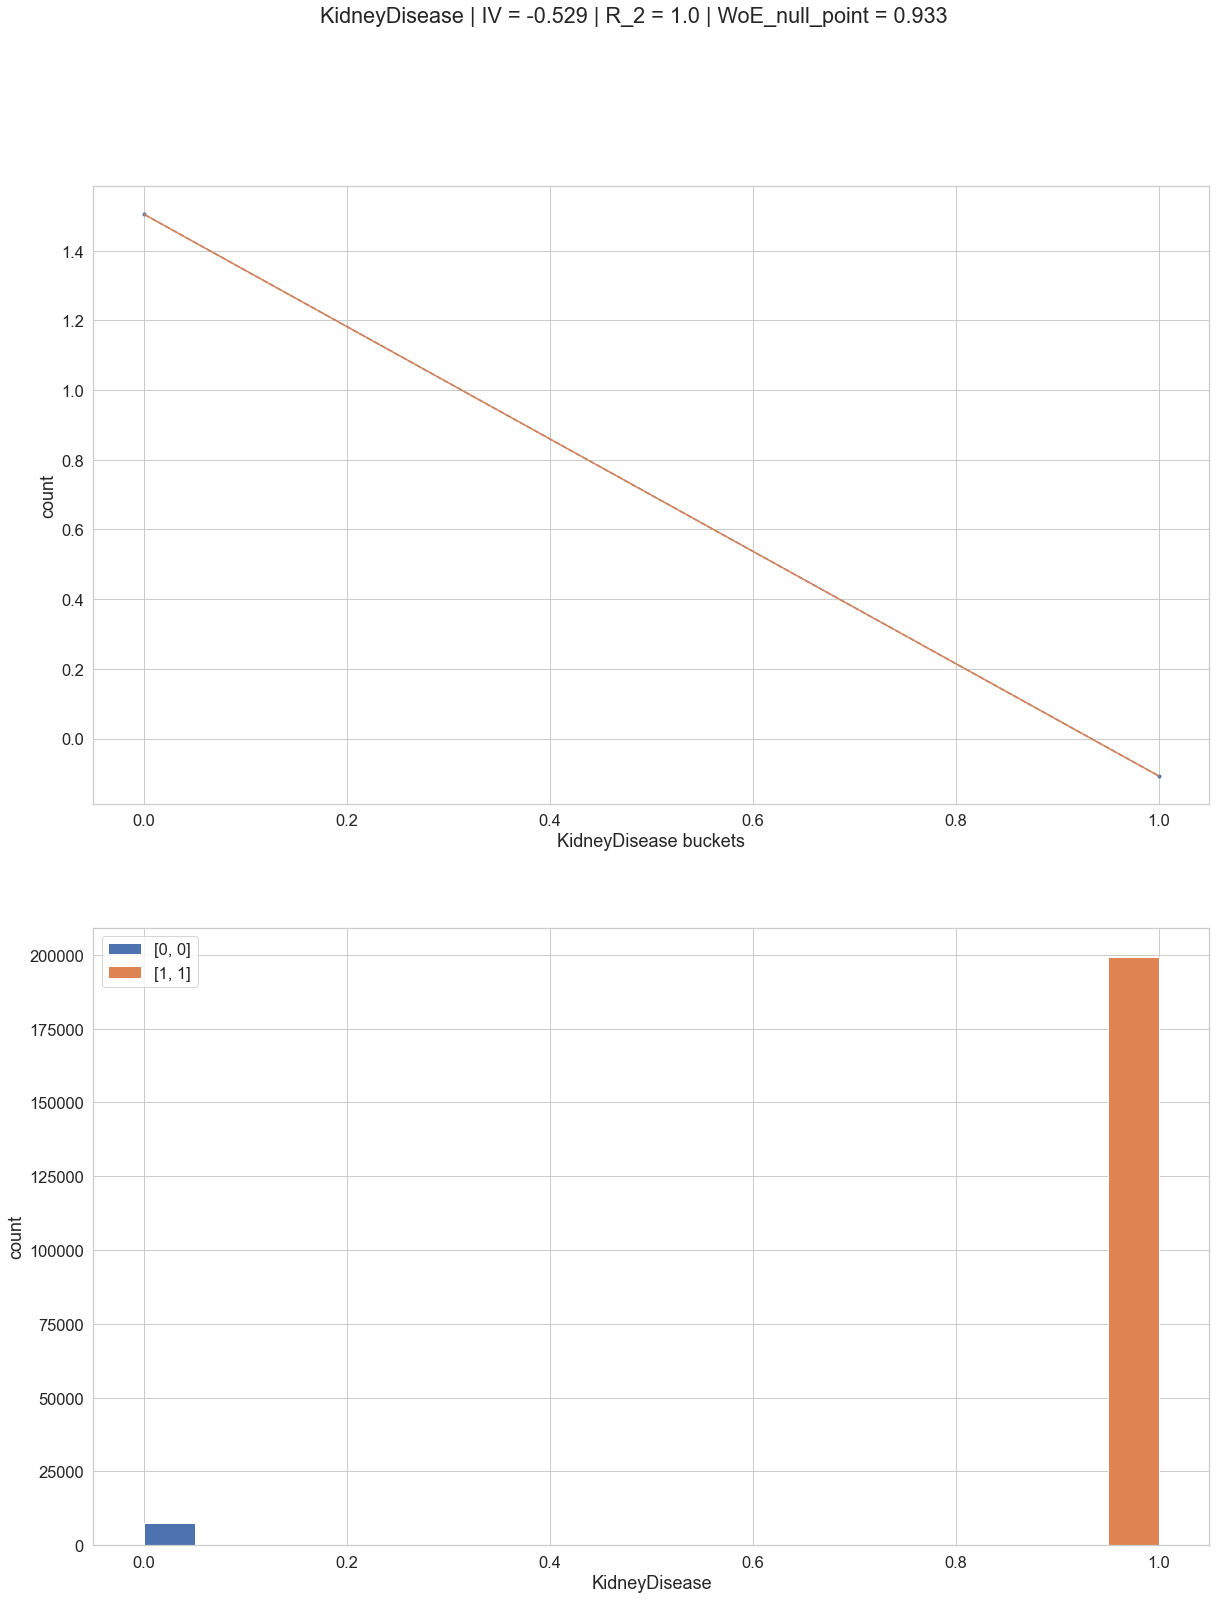

In [ ]:
name = 'KidneyDisease'

data_train_clipped = data_train
data_train_clipped[name] = data_train_clipped[name].dropna()

woe_line(data_train_clipped, data_train_clipped[name], y_train, 2, name, 'HeartDisease')

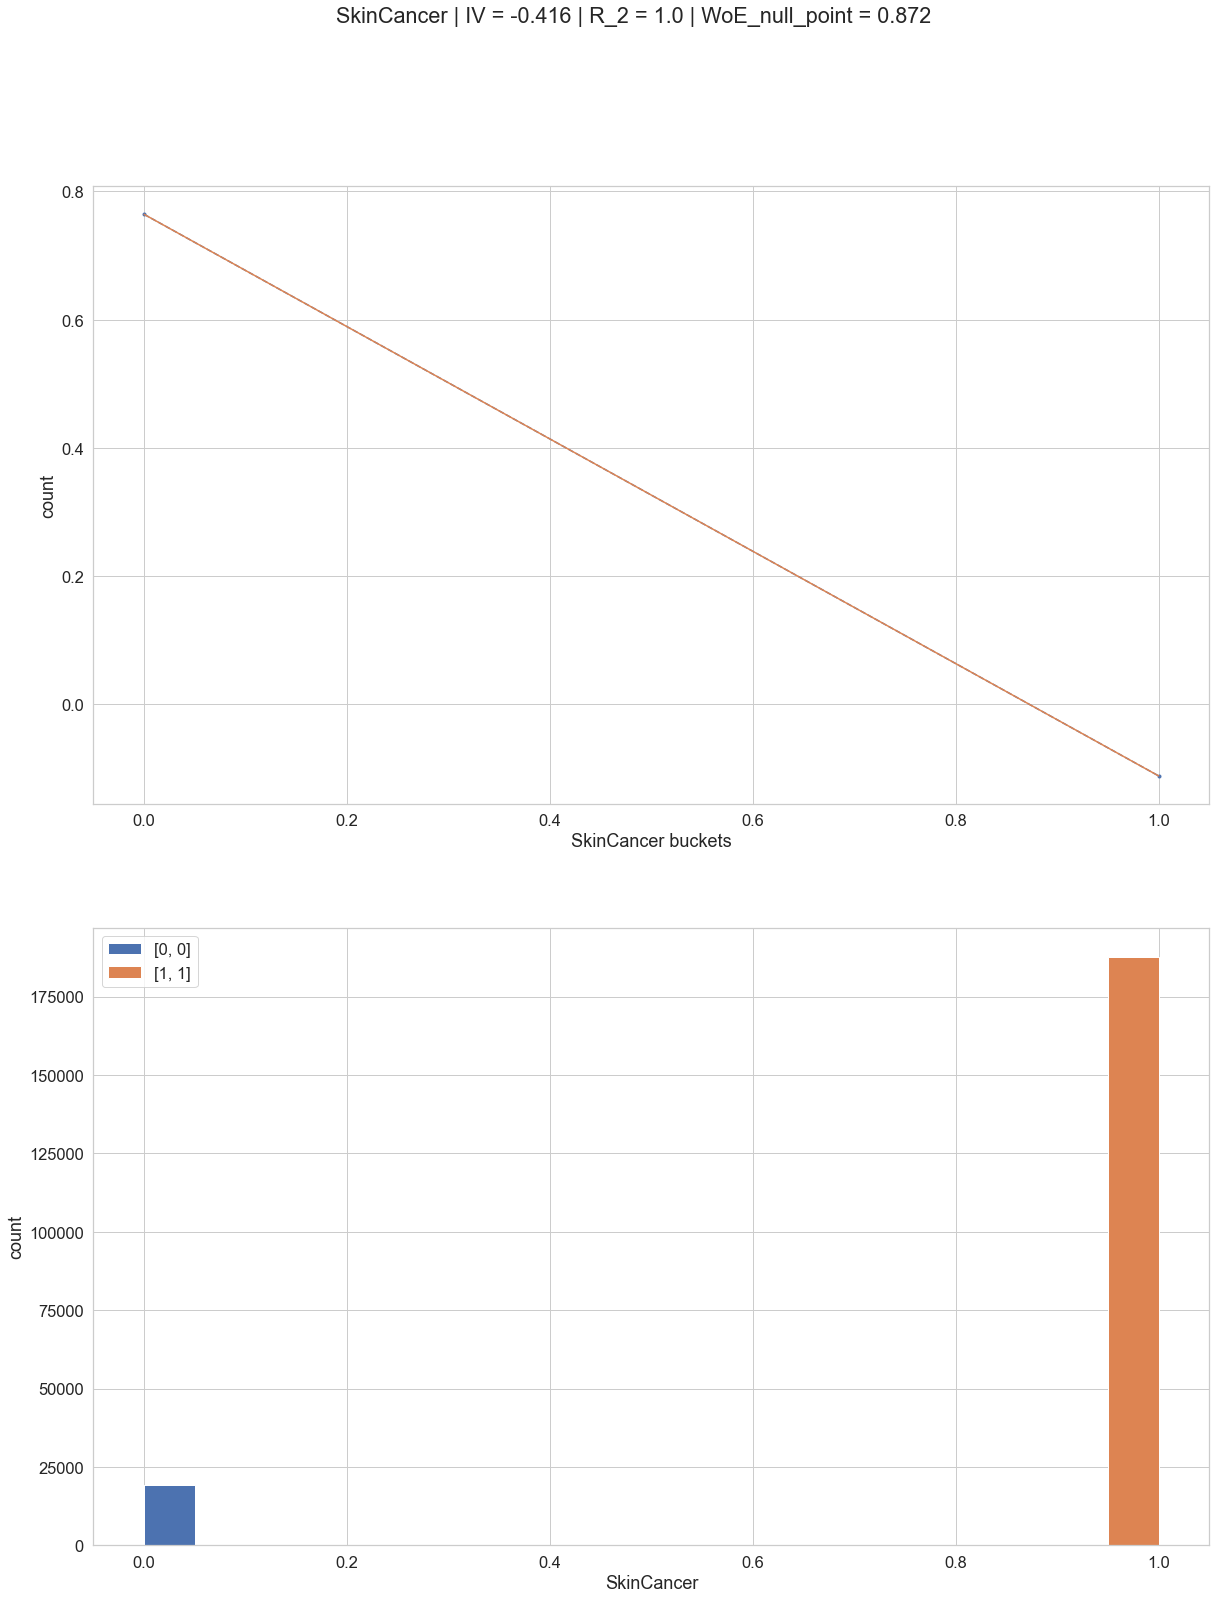

In [ ]:
name = 'SkinCancer'

data_train_clipped = data_train
data_train_clipped[name] = data_train_clipped[name].dropna()

woe_line(data_train_clipped, data_train_clipped[name], y_train, 2, name, 'HeartDisease')

Для конечного преобразования признаков удобно написать функцию, ведь преобразования для всех трех выборок должны быть одинаковыми:

In [ ]:
def linearize_features(df):

    df['BMI'] = np.log(df['BMI'].clip(lower = 10, upper = 50))
    df['SleepTime'] = df['SleepTime'].clip(lower = 2, upper = 14)

    return df

In [ ]:
data_train = linearize_features(data_train)
data_val   = linearize_features(data_val)
data_test  = linearize_features(data_test)

In [ ]:
data_train

,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,PhysicalActivity,...,White,Excellent,Fair,Good,Poor,Very good,No,"No, borderline diabetes",Yes,Yes (during pregnancy)
0,2.302585,1.0,1,1,0.0,0.0,1.0,1,57,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2.302585,1.0,1,1,3.0,0.0,0.0,1,67,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2.302585,0.0,0,1,0.0,0.0,1.0,0,37,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2.302585,NaN,1,1,0.0,0.0,1.0,1,47,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2.302585,1.0,1,1,7.0,30.0,1.0,1,27,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206838,2.302585,1.0,1,1,0.0,0.0,1.0,1,77,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
206839,2.302585,0.0,1,1,0.0,0.0,1.0,1,52,NaN,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
206840,2.302585,1.0,1,1,2.0,0.0,1.0,0,57,NaN,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
206841,2.302585,1.0,1,1,0.0,6.0,1.0,1,21,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0


### 3. Категориальные признаки

Обработайте категориальные признаки, в которых нет пропусков (здесь же можно обработать и бинарные признаки, если не сделали этого ранее). Можно пользоваться кодом из семинара

Сделал ранее, в самом начале.

### 4. Обработка пропусков

Некоторые признаки, как вещественные, так и категориальные, имеют пропуски. Подумайте над природой пропусков и исходя из этого обработайте их.

**Важно:**
1. Не факт, что добавлять везде флаг пропуска хорошо. Это может сильно увеличить число переменных, а данных для обучения модели на флаге может быть и недостаточно.
2. Возможно, некоторые значения признаков стоит проинтерпретировать как пропуски. С этим можно поэкспериментировать

NaN содержатся в:

Smoking             
DiffWalking         
Race                 
PhysicalActivity    
SleepTime           

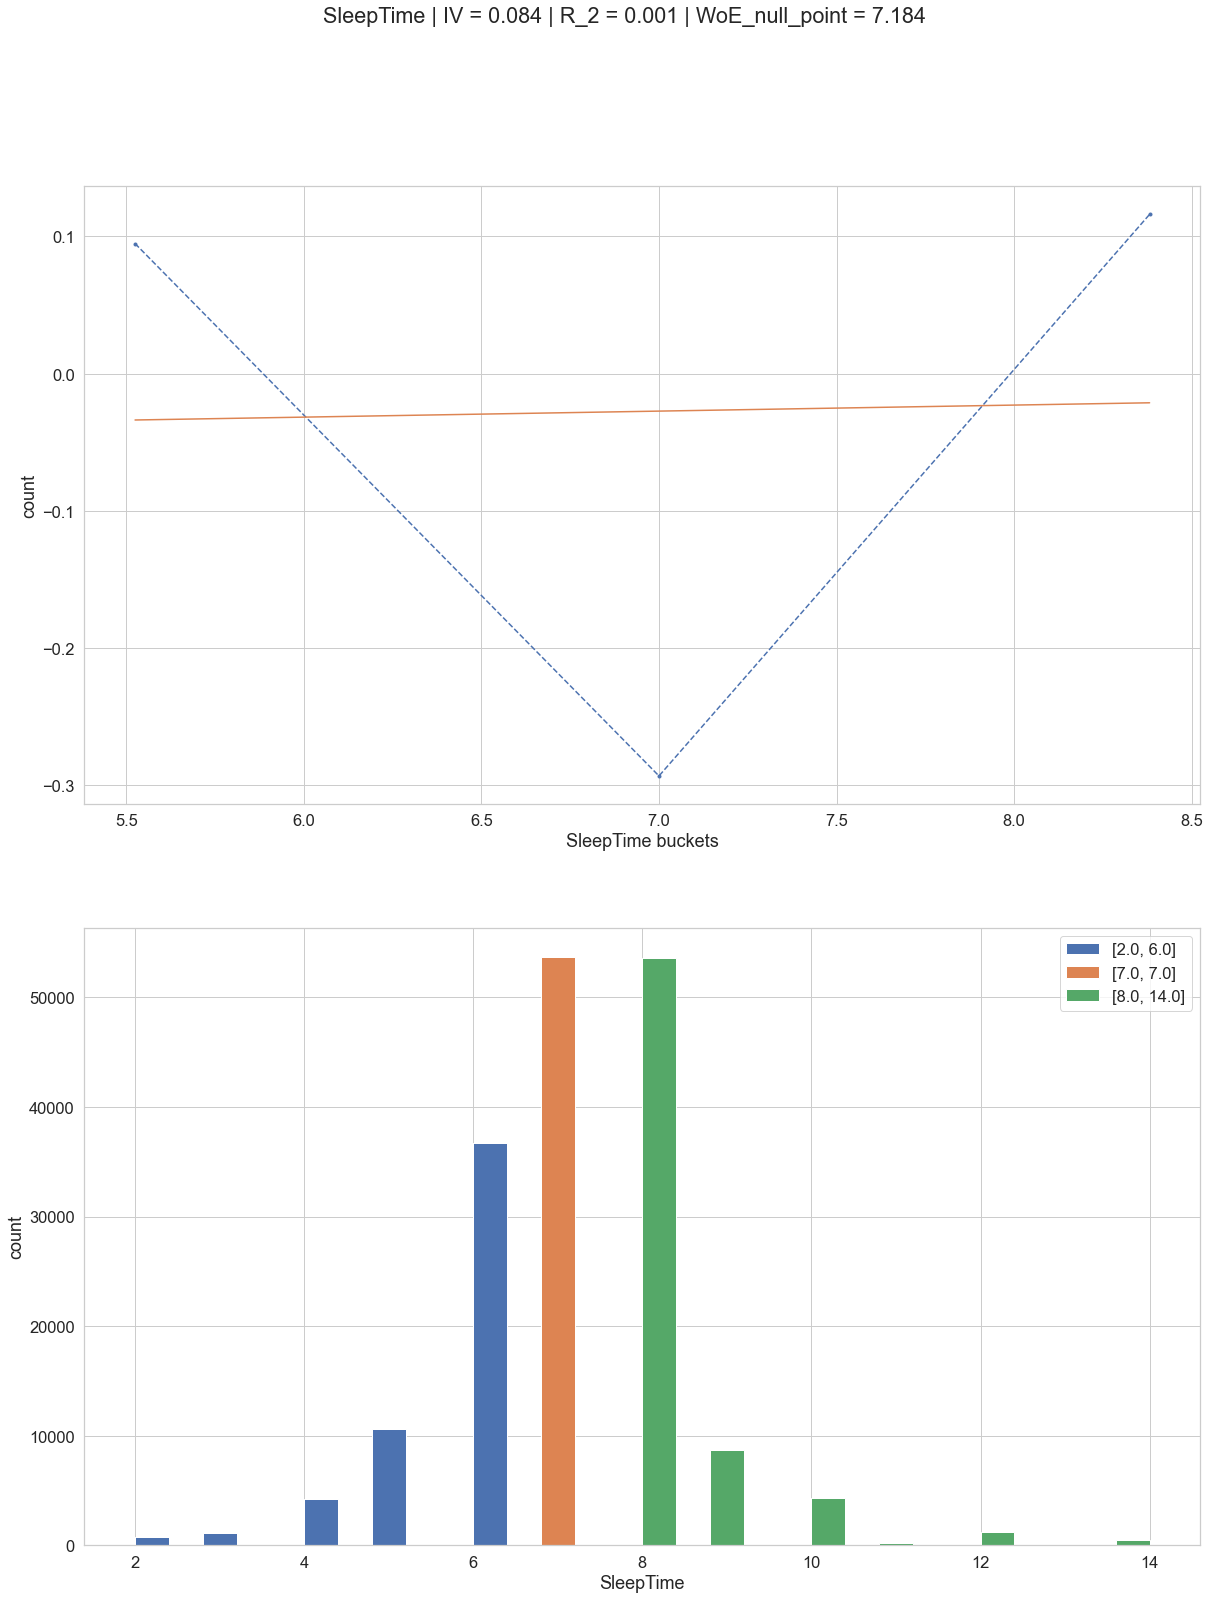

In [ ]:
name = 'SleepTime'

data_train_clipped = data_train
data_train_clipped[name] = data_train_clipped[name].dropna()

woe_line(data_train_clipped, data_train_clipped[name], y_train, 3, name, 'HeartDisease')

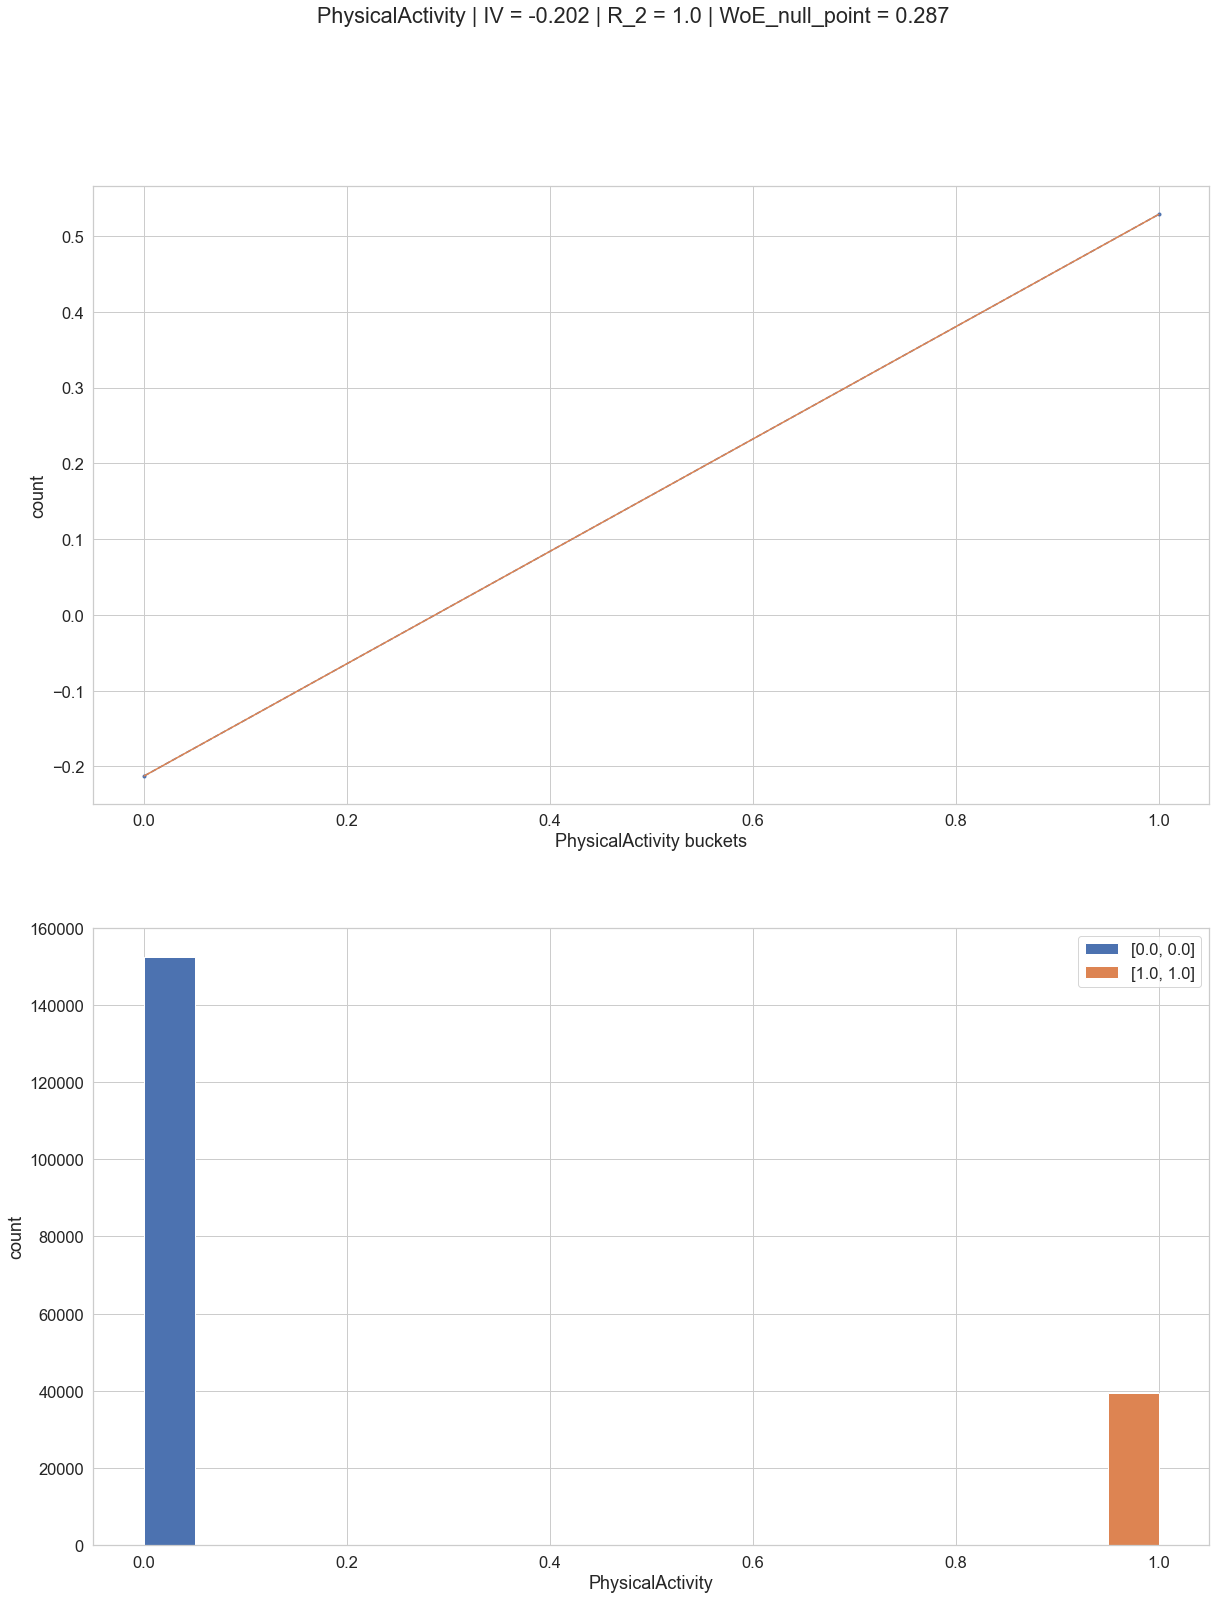

In [ ]:
name = 'PhysicalActivity'

data_train_clipped = data_train
data_train_clipped[name] = data_train_clipped[name].dropna()

woe_line(data_train_clipped, data_train_clipped[name], y_train, 2, name, 'HeartDisease')

In [ ]:
def change_nan(df):

    smoking = woe_null_point(data_train['Smoking'], y_train)[0][0]
    walking = woe_null_point(data_train['DiffWalking'], y_train)[0][0]


    df['Smoking'].fillna(smoking, inplace = True)
    df['DiffWalking'].fillna(walking, inplace = True)
    df['PhysicalActivity'].fillna(0.262, inplace = True)
    df['SleepTime'].fillna(7.184, inplace = True)

    return df

In [ ]:
data_train = change_nan(data_train)
data_test  = change_nan(data_test)
data_val = change_nan(data_val)

### 5. Обучение модели

Обучите [LogisticRegression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) на обучающей выборке

In [ ]:
def roc_auc(y_true, y_pred):
    """Считает ROC AUC
    y_true - метки классов (0/1)
    y_pred - предсказания модели
    """
    n1_all = np.sum(y_true)
    n0_all = len(y_true) - n1_all

    df = pd.DataFrame()
    df['y_true'] = y_true
    df['y_pred'] = y_pred

    df = df.groupby('y_pred').agg({'y_true' : ['sum', 'count']})
    df.iloc[:, 1] -= df.iloc[:, 0]
    df.columns = ['n1', 'n0']

    #df = df.sort_values('y_pred', ascending=False)

    df = df.iloc[::-1, :]

    tpr = [0]
    fpr = [0]
    roc_auc = 0.0

    for i in range(len(df)):
        tpr.append(tpr[-1] + df.iloc[i]['n1'] / n1_all)
        fpr.append(fpr[-1] + df.iloc[i]['n0'] / n0_all)
        roc_auc += (fpr[-1] - fpr[-2]) * (tpr[-1] + tpr[-2]) / 2

    plt.figure(figsize=(7, 7))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1], ls='--')
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title(f'ROC AUC = {roc_auc:.3f}')

    return roc_auc

In [ ]:
X_train = data_train

model = LogisticRegression(penalty='none')
model.fit(X_train, y_train)

/Users/daniilkorolkov/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(penalty='none')

Посчитайте предсказания на валидационной выборке. Можно пользоваться кодом из семинара

In [ ]:
pred_val = model.predict_proba((data_val))[:, 1]

Постройте ROC кривую для валидационной выборки и посчитайте ROC AUC. Можно воспользоваться кодом из семинара или реализацией в sklearn ([ROC кривая](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html), [ROC AUC](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html)).

0.8377722173163399

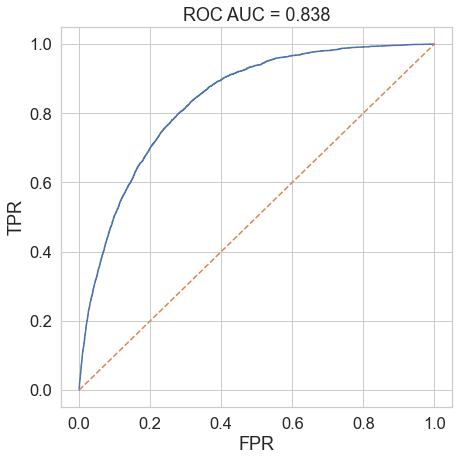

In [ ]:
roc_auc(y_val, pred_val)

In [ ]:
data_train.columns.shape

(29,)

Попробуйте также обучить не на всех признаках (например, можно взять N признаков с самым большим IV). Более подробно про отбор признаков будет рассказано в дальнейшем

0.7269218363598764

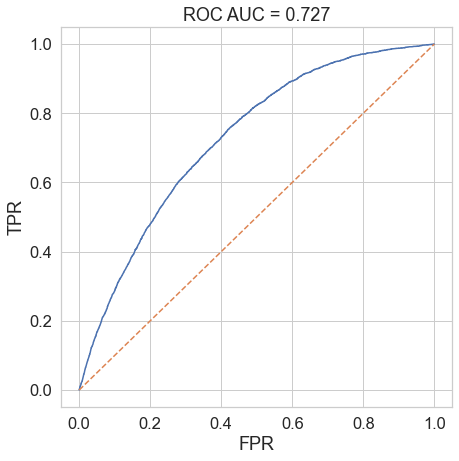

In [ ]:
features = ['BMI', 'MentalHealth', 'AlcoholDrinking', 'AgeCategory', 'Sex'] # прогнал построение графиков и выбрал признаки с наилучшим IVV (первые три признаки, четвёртый в довесок)

model_1 = LinearRegression()
X_train_1 = data_train[features]
model.fit(X_train_1, y_train)

pred_val = model.predict_proba(data_val[features])[:, 1]

roc_auc(y_val, pred_val)

### 6. Измерение качества на тестовой выборке

Выберите какую-то из моделей, которые вы обучили раннее, и посчитайте ее предсказания на тестовой выборке.

In [ ]:
data_test.columns.shape

(29,)

In [ ]:
pred_test = model.predict_proba(data_test)[:,1]

0.8331047788540256

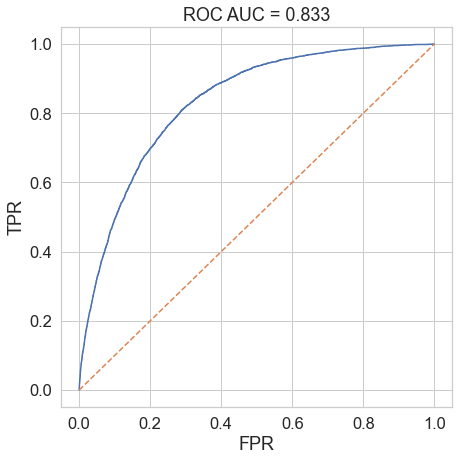

In [ ]:
roc_auc(y_test, pred_test)